In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')  

In [2]:
data = np.array(data) 
rows, cols = data.shape 
labels = data[:, 0]  
pixels = data[:, 1:]
X_train = pixels / 255.0

def one_hot_encoding(y, num_classes=10):
    m = y.shape[0]  # number of examples (42000)
    Y = np.zeros((m, num_classes))  # Create matrix of zeros: (42000, 10)
    Y[np.arange(m), y.astype(int)] = 1
    
    return Y

Y_train = one_hot_encoding(labels) 

Y_all_threes  = (labels == 3)
Y_all_threes_encoded = Y_all_threes.astype(float)
Y_all_threes[:10], Y_all_threes_encoded[:10]
X_train_mod = X_train + np.random.normal(0,0.02, size= 42000*784).reshape(42000, 784)


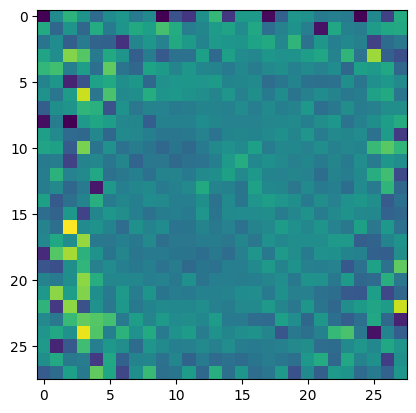

In [ ]:
beta = np.zeros(X_train.shape[1])
beta.shape

beta = np.linalg.inv(X_train_mod.T @ X_train_mod) @ X_train_mod.T @ Y_all_threes_encoded
plt.imshow(beta.reshape(28,28))
#image of linear regression below

In [4]:
eta = 0.005
for i in range(70):
    grad = 2 * (1/42000) * (X_train_mod @ beta - Y_all_threes_encoded)@X_train_mod
#    grad = 2 * (1/42000) * X_train_mod.T @(X_train_mod @ beta - Y_all_threes_encoded)
    
    new_beta = beta - eta * grad
    #print("new beta", new_beta)
    beta = new_beta
    


In [6]:
N = 20
X = np.random.normal(0,1, size = 2 * N).reshape(N,2)
y = X @ np.array([3, 4]) + np.random.normal(0, 0.1, size = N)



In [ ]:
beta = np.array([1,1])
eta = 0.1
for i in range(30):
    grad = 2 * (1/N) * (X @ beta - y) @ X
    new_beta = beta - eta * grad
    print("new beta", new_beta)
    beta = new_beta




new beta [1.19612249 1.7295552 ]
new beta [1.37044863 2.28417391]
new beta [1.5259073  2.70566712]
new beta [1.66493503 3.02586505]
new beta [1.78957468 3.26899852]
new beta [1.90155234 3.45351229]
new beta [2.00233738 3.59344579]
new beta [2.0931896  3.69948442]
new beta [2.17519641 3.77976011]
new beta [2.24930232 3.84046079]
new beta [2.31633245 3.88629449]
new beta [2.37701135 3.9208427 ]
new beta [2.43197828 3.94682944]
new beta [2.48179959 3.96632601]
new beta [2.52697887 3.98090701]
new beta [2.56796535 3.99176904]
new beta [2.60516092 3.99982109]
new beta [2.63892594 4.00575334]
new beta [2.66958424 4.01008951]
new beta [2.69742735 4.01322677]
new beta [2.72271808 4.01546606]
new beta [2.74569371 4.01703517]
new beta [2.76656866 4.01810631]
new beta [2.78553693 4.01880951]
new beta [2.80277412 4.01924275]
new beta [2.81843932 4.01947972]
new beta [2.83267675 4.01957567]
new beta [2.84561717 4.01957192]
new beta [2.85737923 4.01949922]
new beta [2.86807061 4.01938038]


In [ ]:
#begin logistic regression w/o grad descent experiment
from sklearn.linear_model import LogisticRegression

In [10]:
model = LogisticRegression(penalty=None, C=1.0, solver='lbfgs', random_state=42) # they don't use gradient desc. they use lbfgs.  

In [11]:
model.fit(X_train, Y_all_threes_encoded)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [12]:
y_proba = model.predict_proba(X_train)

In [13]:
np.round(y_proba[:10][:,1]), Y_all_threes_encoded[:10]

(array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 1.]))

In [14]:
sk_learn_beta = model.coef_.reshape(28,28)

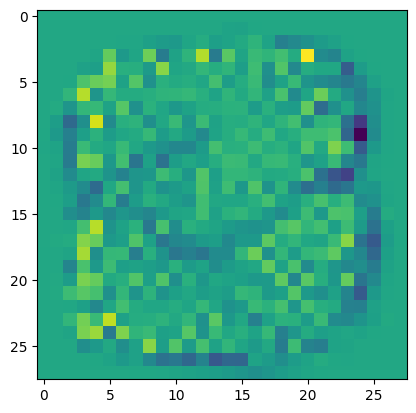

In [15]:
plt.imshow(sk_learn_beta.reshape(28,28))

In [ ]:
correct_predicted_true = (y_proba[:,1] > 0.5).astype(float) * Y_all_threes_encoded
sum(correct_predicted_true)/ sum(Y_all_threes_encoded)
#sklearn using logistic regression and lbfgs solver (not gradient descent)

np.float64(0.8467019076074466)

In [ ]:
#begin logistic regression with grad descent experiment
def sigmoid(z):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

def compute_loss(y_true, y_pred):
    """Binary cross-entropy loss."""
    # Clip predictions to avoid log(0)
    y_pred = np.clip(y_pred, 1e-9, 1 - 1e-9)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def gradient_descent(X, y, learning_rate, n_iterations):
    """Gradient Descent for Logistic Regression."""
    m, n = X.shape
    y = y.reshape(len(y),1)
    # Initialize weights (w) and bias (b)
    w = np.zeros((n, 1))
    b = 0
    loss_history = []

    for i in range(n_iterations):
        if i % 10 == 0 :
            print("on interation ", i)
        # Linear hypothesis: z = Xw + b
        z = np.dot(X, w) + b
        # Activation: y_pred = sigmoid(z)
        y_pred = sigmoid(z)
                
        # Calculate gradients
        dw = (1 / m) * np.dot(X.T, (y_pred - y)) # really \partial CE / \partial w 
        db = (1 / m) * np.sum(y_pred - y)
        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Record loss
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)

    return w, b, loss_history

In [18]:
X_train.shape

(42000, 784)

In [19]:
weights, bias, losses  = gradient_descent(X_train, Y_all_threes_encoded, 0.01, 1000)

on interation  0
on interation  10
on interation  20
on interation  30
on interation  40
on interation  50
on interation  60
on interation  70
on interation  80
on interation  90
on interation  100
on interation  110
on interation  120
on interation  130
on interation  140
on interation  150
on interation  160
on interation  170
on interation  180
on interation  190
on interation  200
on interation  210
on interation  220
on interation  230
on interation  240
on interation  250
on interation  260
on interation  270
on interation  280
on interation  290
on interation  300
on interation  310
on interation  320
on interation  330
on interation  340
on interation  350
on interation  360
on interation  370
on interation  380
on interation  390
on interation  400
on interation  410
on interation  420
on interation  430
on interation  440
on interation  450
on interation  460
on interation  470
on interation  480
on interation  490
on interation  500
on interation  510
on interation  520
on i

In [20]:
weights.shape

(784, 1)

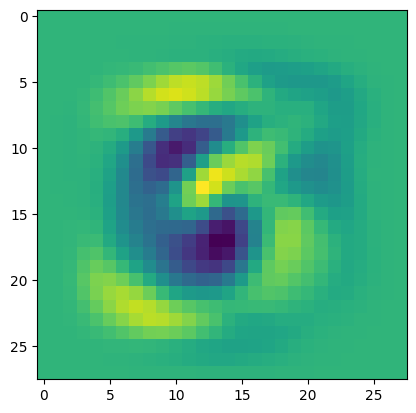

In [21]:

plt.imshow(weights.reshape(28,28))

In [ ]:
#could be equally accurate, this just shows what they do diff.
# # the first is sklearn logistic without grad desc
# and the second is sigmoid and binary cross entropy loss --> still logistic just w grad descent 

In [ ]:
#begin single neuron NN experiment 

import torch

# Check if MPS backend is available
if torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using Apple GPU with Metal backend (MPS).")
else:
    device = torch.device("cpu")
    print("MPS not available, falling back to CPU.")

# Example: Create a tensor and move it to the determined device
x = torch.rand(5, 5).to(device)
print(f"Tensor x is on device: {x.device}")

# Example: Perform an operation on the device
y = torch.rand(5, 5).to(device)
z = x + y
print(f"Resulting tensor z is on device: {z.device}")

Using Apple GPU with Metal backend (MPS).
Tensor x is on device: mps:0
Resulting tensor z is on device: mps:0


In [25]:
import torch
import torch.nn as nn
import torch.optim as optim

In [26]:
# make tensor versions
X_tor = torch.tensor(X_train, dtype=torch.float32)
y_tor = torch.tensor(Y_all_threes_encoded.reshape(-1, 1), dtype=torch.float32)

In [27]:
# put the sigmoid in the nn class
class LogisticRegressionSigmoidTorch(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionSigmoidTorch, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid() # Explicit sigmoid layer
        nn.init.zeros_(self.linear.weight) #starts with zeros


    def forward(self, x):
        z = self.linear(x)
        y_pred = self.sigmoid(z) # Apply sigmoid in forward pass
        return y_pred


In [28]:
model_sig = LogisticRegressionSigmoidTorch(input_dim=28*28)

# 2. Define the simple BCELoss and Optimizer
# Note: This requires the model output to be probabilities (0 to 1)
criterion_bce = nn.BCELoss() 
optimizer_sig = optim.SGD(model_sig.parameters(), lr=0.01)

In [29]:
# 3. Training Loop with Automatic Differentiation
n_iterations = 1000
loss_history_sig = []

for iteration in range(n_iterations):
    # Forward pass: compute predicted y (probabilities)
    y_pred_prob = model_sig(X_tor)
    
    # Compute loss
    loss = criterion_bce(y_pred_prob, y_tor)
    loss_history_sig.append(loss.item())

    # Zero gradients, backward pass, and update weights
    optimizer_sig.zero_grad()
    loss.backward()
    optimizer_sig.step()


In [30]:

for item in model_sig.named_parameters():
    print(item[0])
    if item[0] == "linear.weight":
        nn_beta = item[1]


linear.weight
linear.bias


In [31]:
nn_beta.shape

torch.Size([1, 784])

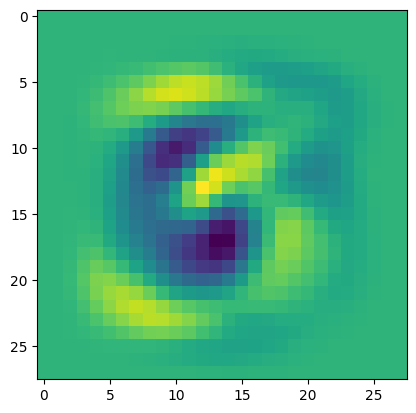

In [32]:
plt.imshow(nn_beta.detach().numpy().reshape(28,28))

In [33]:
# put the sigmoid in the nn class
class OriginalNNM(nn.Module):
    def __init__(self, input_dim):
        super(OriginalNNM, self).__init__()
        self.linear = nn.Linear(input_dim, 10)
        self.sigmoid = nn.Sigmoid()
        nn.init.zeros_(self.linear.weight)


    def forward(self, x):
        z = self.linear(x)
        y_pred = self.sigmoid(z) # Apply sigmoid in forward pass
        return y_pred
